### Test decision tree

In [1]:
# Import libraries
from sklearn import datasets, svm
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

df = pd.read_csv('../data/preprocessed.csv').iloc[:,1:]

# Scale data
scaler = StandardScaler()
for i in range(5):
    df.iloc[:,i] = scaler.fit_transform(df.iloc[:,i].values.reshape(-1,1))

Perform simple oversampling to avoid bias in the model

In [2]:
# #! Uncomment to run oversampling script
# # Set pseudo-random number generator
# np.random.default_rng(seed=123)

# filter = lambda value: len(df['Machine failure'][df['Machine failure'] == value])
# # Build oversampled dataset
# machine_failures = df[df['Machine failure']==1].reset_index().drop('index', axis=1)
# oversampled_data = df.copy().values
# # Init count 
# count = oversampled_data.shape[0]-1
# cond = df['Machine failure'] == 1
# for i in range(count - cond.sum()):
#     oversampled_data = np.vstack((oversampled_data,machine_failures.iloc[int(np.floor(np.random.uniform(0,filter(1)))),:].values))

# # An oversampled dataset was also saved in data as the above two lines are a bit time consuming
# oversampled_data = pd.DataFrame(dict(zip(df.columns,oversampled_data.T)))
# oversampled_data.to_csv('../data/oversampled_data.csv')

# Read oversampled_data.csv
oversampled_data = pd.read_csv('../data/oversampled_data.csv')
# # Prepare data for training
X = oversampled_data.drop('Machine failure', axis=1).values
y = oversampled_data['Machine failure'].values

The decision tree on the oversampled dataset shows astonishing results in terms of both specificity and recall

True Negative rate (specificity):  1.0
True positive rate (recall):  1.0
False Negative Rate:  0.0
False positive rate:  0.0
Positive Likelihood ratio:  inf


C:\Users\valer\AppData\Local\Temp\ipykernel_14824\1672345280.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  print('Positive Likelihood ratio: ', TP/FP)


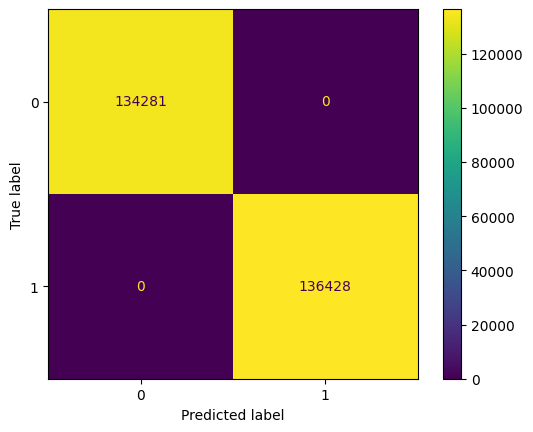

In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

cm = confusion_matrix(clf.predict(X), y)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1) 

#### Apply to train

True Negative rate (specificity):  0.9999813571961222
True positive rate (recall):  0.9980601535406773
False Negative Rate:  0.0019398464593226583
False positive rate:  1.86428038777553e-05
Positive Likelihood ratio:  514.5047169811321


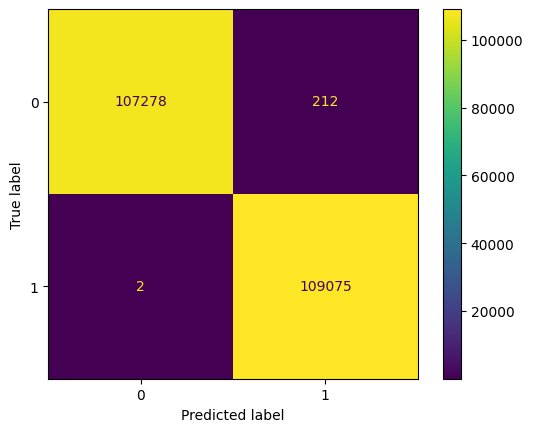

In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=20)
clf = clf.fit(X_train, y_train)

cm = confusion_matrix(clf.predict(X_train), y_train)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

#### Apply to test

True Negative rate (specificity):  0.997814895744602
True positive rate (recall):  0.9968682067720422
False Negative Rate:  0.0031317932279577576
False positive rate:  0.002185104255397974
Positive Likelihood ratio:  318.3058823529412


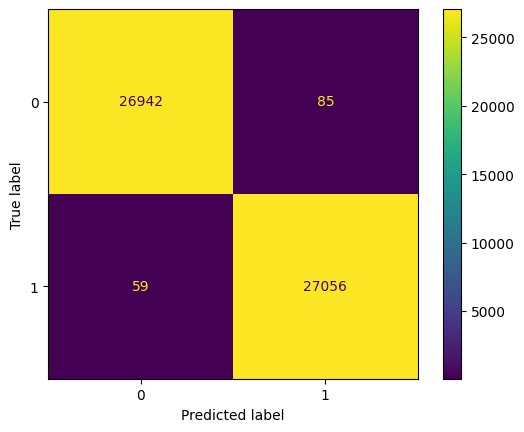

In [25]:
cm = confusion_matrix(clf.predict(X_test), y_test)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

In [ ]:
# Save model with pickle
import pickle
import os
models_dir = '..\models'

# Save model
filename = 'decision_tree.sav'
pickle.dump(clf, open(os.path.join(models_dir,filename), 'wb'))

### Try bootstrap aggregation

In [20]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=tree.DecisionTreeClassifier(max_depth=20),
                     n_estimators=10, oob_score=True, random_state=0, n_jobs=-1).fit(X_train, y_train)

c:\Users\valer\OneDrive\Desktop\GitHub Projects\kaggle-challenge-machine-failure\ML\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\valer\OneDrive\Desktop\GitHub Projects\kaggle-challenge-machine-failure\ML\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


True Negative rate (specificity):  0.9999813571961222
True positive rate (recall):  0.9978130976236881
False Negative Rate:  0.0021869023763119166
False positive rate:  1.86428038777553e-05
Positive Likelihood ratio:  456.26778242677824


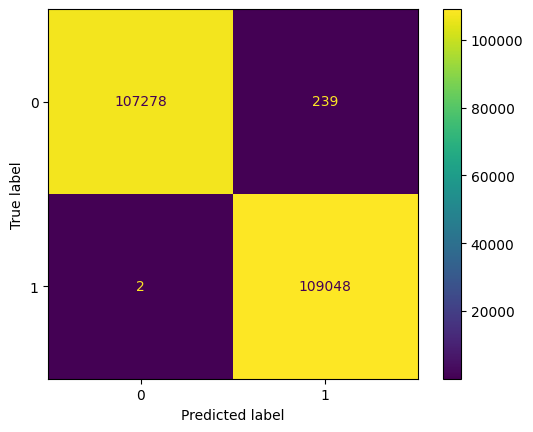

In [21]:
cm = confusion_matrix(clf.predict(X_train), y_train)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

True Negative rate (specificity):  0.9997407503425799
True positive rate (recall):  0.9966102943885634
False Negative Rate:  0.0033897056114365887
False positive rate:  0.00025924965742007977
Positive Likelihood ratio:  294.0108695652174


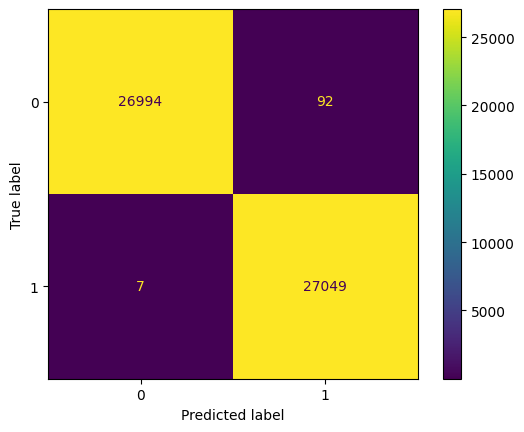

In [22]:
cm = confusion_matrix(clf.predict(X_test), y_test)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

In [23]:
# Save model
filename = 'bagging_tree.sav'
pickle.dump(clf, open(os.path.join(models_dir,filename), 'wb'))